# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 1 | markala
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | saratamata
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | alvesta
Processing Record 9 of Set 1 | alo
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | taulaga
Processing Record 14 of Set 1 | mossel bay
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | swift current
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | mana
Processing Record 20 of Set 1 | ust-tsilma
Processing Record 21 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,24.87,69,0,4.12,US,1721400065
1,stanley,54.8680,-1.6985,27.06,55,20,5.14,GB,1721400134
2,markala,13.7021,-6.0659,34.10,46,19,2.23,ML,1721400136
3,port-aux-francais,-49.3500,70.2167,0.04,66,61,3.69,TF,1721400137
4,bredasdorp,-34.5322,20.0403,13.84,69,12,8.10,ZA,1721400139


In [6]:
city_data_df.to_csv(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.87,69,0,4.12,US,1721400065
1,stanley,54.8680,-1.6985,27.06,55,20,5.14,GB,1721400134
2,markala,13.7021,-6.0659,34.10,46,19,2.23,ML,1721400136
3,port-aux-francais,-49.3500,70.2167,0.04,66,61,3.69,TF,1721400137
4,bredasdorp,-34.5322,20.0403,13.84,69,12,8.10,ZA,1721400139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

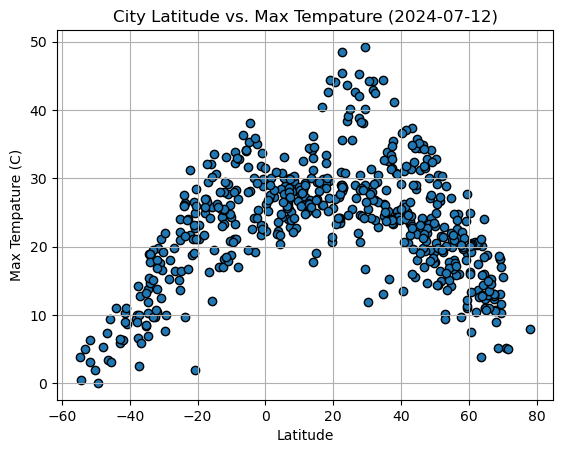

In [8]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Max Temp'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Max Tempature (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Tempature (C)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

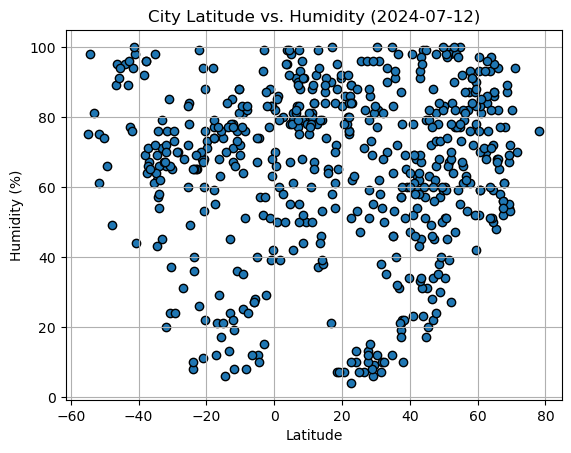

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Humidity'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Humidity (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

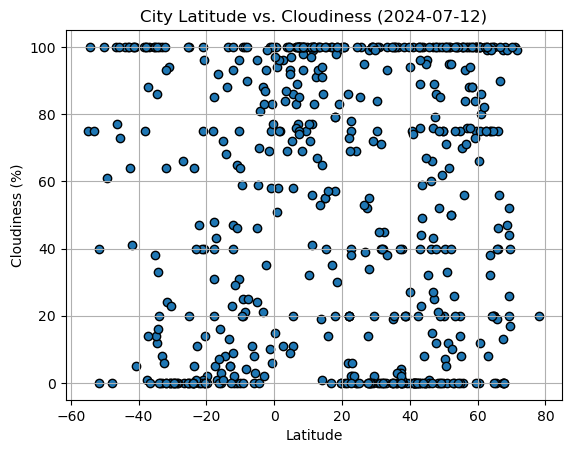

In [10]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Cloudiness'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Cloudiness (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

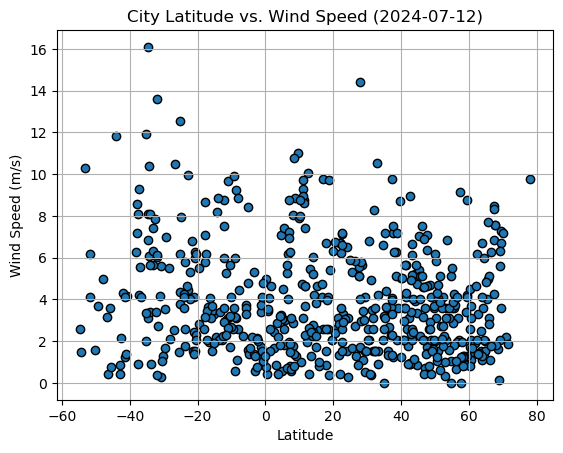

In [11]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(
    x = city_data_df['Lat'],
    y = city_data_df['Wind Speed'],
    edgecolor = 'black'
)

# Incorporate the other graph properties
ax.set_title('City Latitude vs. Wind Speed (2024-07-12)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.grid(True)

# Save the figure
plt.savefig(r"C:\Users\lukej\OneDrive\Documents\GitHub\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plots(df, x, y):
    slope, intercept, rvalue, pvalue, std_err = linregress(df[x], df[y])
    r_squared = rvalue ** 2
    df_liniregress = df.copy()
    df_liniregress["liniregress_y"] = [((x_liniregress*slope) + intercept) for x_liniregress in df[x] ]

    fig, ax = plt.subplots()
    ax.scatter(
        x = df_liniregress[x],
        y = df_liniregress[y],
        color = 'b',
        label = "Data Point"
    )
    ax.plot(df_liniregress[x],
            df_liniregress[f'liniregress_y'],
            color = 'r',
            label = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    )
    ax.set_title(x + " vs " + y)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    return print(f"The r^2 values is {r_squared}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.87,69,0,4.12,US,1721400065
1,stanley,54.8680,-1.6985,27.06,55,20,5.14,GB,1721400134
2,markala,13.7021,-6.0659,34.10,46,19,2.23,ML,1721400136
5,alvesta,56.8993,14.5556,24.69,53,76,3.09,SE,1721400140
6,alo,6.5486,4.2686,24.07,91,100,4.00,NG,1721400141


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,0.04,66,61,3.69,TF,1721400137
4,bredasdorp,-34.5322,20.0403,13.84,69,12,8.10,ZA,1721400139
7,broken hill,-31.9500,141.4333,10.46,66,64,13.61,AU,1721400143
8,margaret river,-33.9500,115.0667,14.63,66,100,8.08,AU,1721400144
9,puerto natales,-51.7236,-72.4875,6.25,61,40,6.17,CL,1721400145


###  Temperature vs. Latitude Linear Regression Plot

The r^2 values is 0.3057941946119978


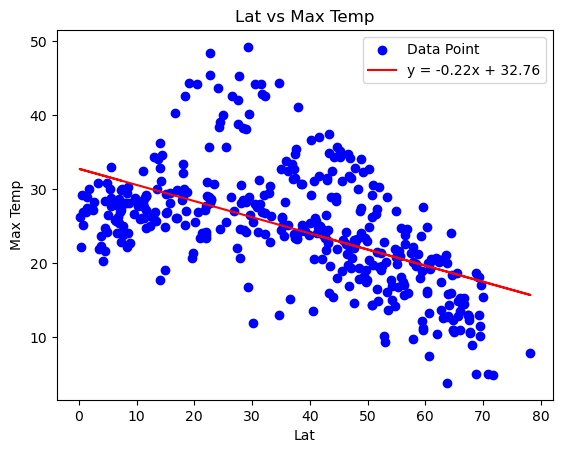

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Max Temp")
plt.show()

The r^2 values is 0.6812122674988106


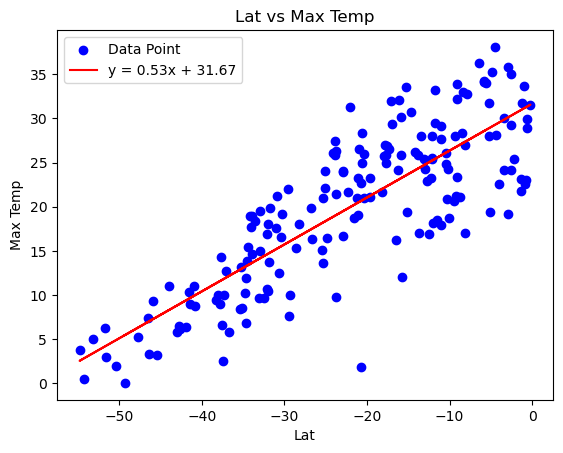

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 values is 7.4216018668834435e-06


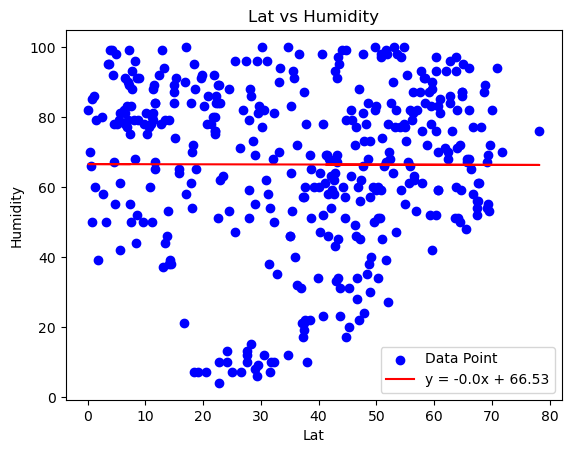

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Humidity")
plt.show()

The r^2 values is 0.07927126603937862


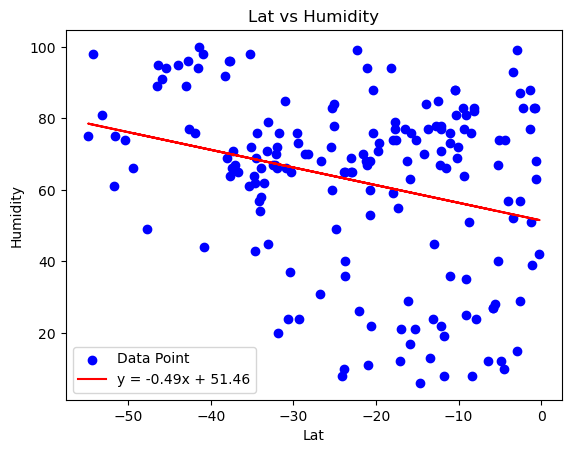

In [18]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 values is 0.018031896371905626


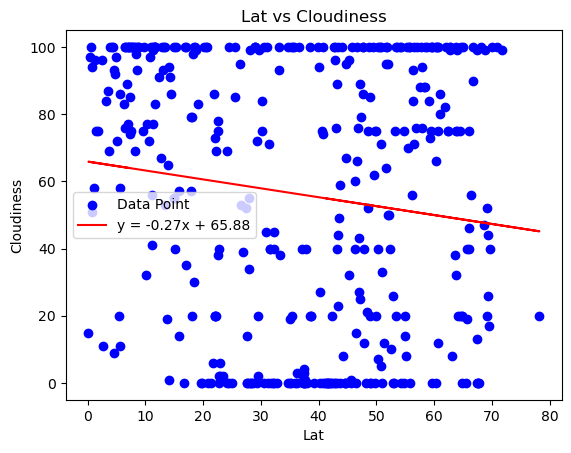

In [19]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Cloudiness")
plt.show()

The r^2 values is 0.01134492879769289


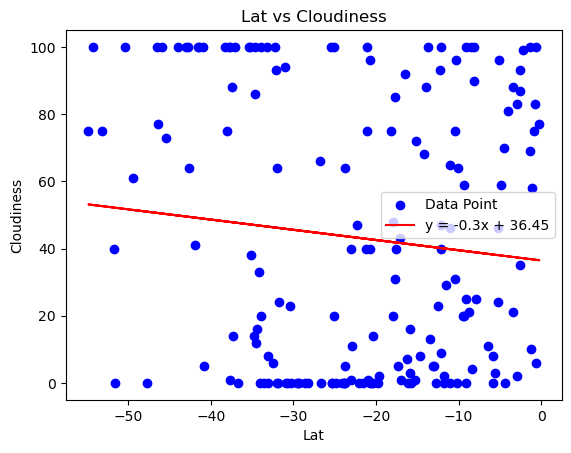

In [20]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 values is 0.006748023331668177


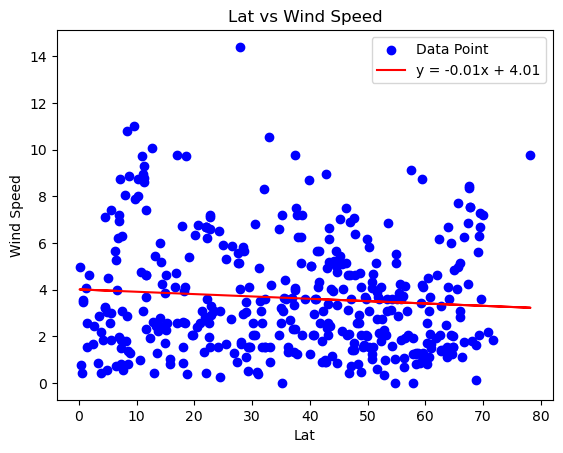

In [21]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df, "Lat" , "Wind Speed")
plt.show()

The r^2 values is 0.03559842119223883


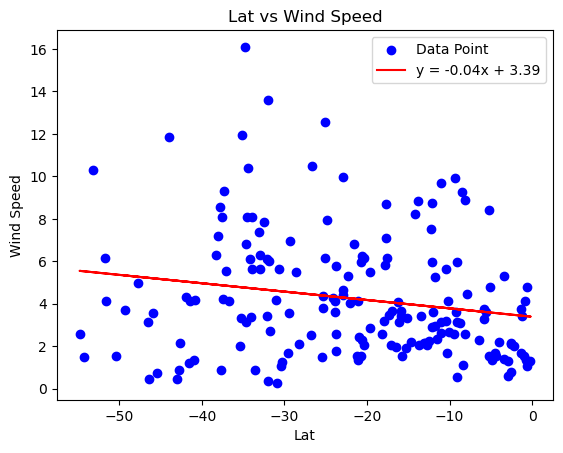

In [22]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df, "Lat" , "Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE